### sklearn-preprocessing
StandardScaler 計算訓練集的平均差和標準差，以便測試資料集使用相同的變換
MinMaxScaler 最小最大值標準化
 
MaxAbsScaler 絕對值最大標準化

RobustScaler

In [1]:
import pandas as pd             #進行資料處理函式庫
import numpy as np              #高階大量的維度陣列與矩陣計算
import matplotlib.pyplot as plt #繪圖
import seaborn as sns           #繪圖
import io                       #負責處理資料 input/output
import requests                 #HTTP Request下載訓練資料用

### 載入資料集

In [8]:
url = "https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv"
s = requests.get(url).content
df_train = pd.read_csv(io.StringIO(s.decode("utf-8")))
#df_train = df_train.drop(labels=["sepal.length"],axis=1)    #移除sepal.length  axis= 1為行 0為列
df_train

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


### 手動編碼
處理名目資料(Nominal variables)-資料前處理 依據特徵資料的特性，可以選擇編碼或自動編碼。

使用編碼時機?

進行深度學習時，神經網路只能處理數值資料。因此我們需要將所有非數字型態的特徵進行轉換。

In [9]:
lable_map = {"Setosa":0,"Versicolor":1,"Virginica":2}
#將編碼後的lable map存至df_train["variety"]中。
df_train["Class"] = df_train["variety"].map(lable_map)

lable_map
df_train

,sepal.length,sepal.width,petal.length,petal.width,variety,Class
0,5.1,3.5,1.4,0.2,Setosa,0
1,4.9,3.0,1.4,0.2,Setosa,0
2,4.7,3.2,1.3,0.2,Setosa,0
3,4.6,3.1,1.5,0.2,Setosa,0
4,5.0,3.6,1.4,0.2,Setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica,2
146,6.3,2.5,5.0,1.9,Virginica,2
147,6.5,3.0,5.2,2.0,Virginica,2
148,6.2,3.4,5.4,2.3,Virginica,2


### 檢查缺失值
使用numpy所提供的函示來檢查是否有NA缺失值，假設有缺失值使用 dropna()來移除。
使用的時機在於只有少量的缺失值適用，若遇到有大量缺失值的情況，或是本身的資料量就很少的情況下建議可以透過機器學習的方法補植來預測缺失值

In [6]:
X = df_train.drop(labels=["variety","Class"],axis=1).values #移除 class,variety(因為字母不參與訓練)
#checked missing data
print("checked missing data(NAN mount):",len(np.where(np.isnan(X))[0]))

checked missing data(NAN mount): 0


### 資料前處理


In [7]:
import numpy as np
np.set_printoptions(suppress=True)

### Standardization 平均&變異數標準化
class proprocessing.StandardScaler(copy=True,with_mean=True,with_std=True):
標準正態分佈化的類

屬性:
1. scale_:ndarray,縮放比例
2. mean_:ndarray,均值  通常為0
3. var_:ndarray,方差   通常為1
4. n_samples_seen_ :int,已處理的樣本個數,調用 partial_fit()時會累加，調用fit()會重設

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# scaled之後的資料零均值，單位方差
print("資料集 X 的平均值 :",X.mean(axis=0))
print("資料集 X 的標準差 :",X.std(axis=0))

print("\nStandardScaler 縮放過後資料集 X 的平均值 : ",X_scaled.mean(axis=0))
print("StandardScaler 縮放過後資料集 X 的標準差 : ", X_scaled.std(axis=0))

資料集 X 的平均值 : [5.84333333 3.05733333 3.758      1.19933333]
資料集 X 的標準差 : [0.82530129 0.43441097 1.75940407 0.75969263]

StandardScaler 縮放過後資料集 X 的平均值 :  [-0. -0. -0. -0.]
StandardScaler 縮放過後資料集 X 的標準差 :  [1. 1. 1. 1.]


d:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

[Text(0.5, 0, 'petal.width'), Text(0.5, 1.0, 'distribution of petal.width')]

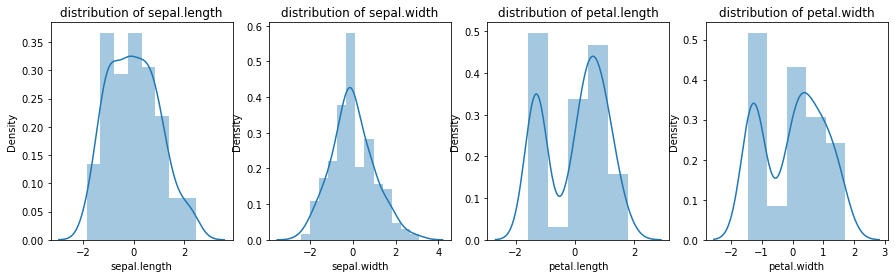

In [21]:
fig , axes = plt.subplots(nrows=1,ncols=4)
fig.set_size_inches(15,4)
sns.distplot(X_scaled[:,0],ax=axes[0])
sns.distplot(X_scaled[:,1],ax=axes[1])
sns.distplot(X_scaled[:,2],ax=axes[2])
sns.distplot(X_scaled[:,3],ax=axes[3])

axes[0].set(xlabel="sepal.length",title = "distribution of sepal.length")
axes[1].set(xlabel="sepal.width",title = "distribution of sepal.width")
axes[2].set(xlabel="petal.length",title = "distribution of petal.length")
axes[3].set(xlabel="petal.width",title = "distribution of petal.width")


### MinMaxScaler 最小最大值標準化
class preprocessing.MinMaxScaler(feature_range=(0,1),copy=True):
將數據縮放在固定區間的類，默認縮放到區間[0,1]

屬性:
1. min_ : ndarray,縮放後的最小值偏移量
2. scale_ : ndarray,縮放比例
3. data_min_ : ndarray,數據最小值
4. data_max_ : ndarray,數據最大值
5. data_range_ : ndarray,數據最大最小範圍的長度

In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1)).fit(X)
X_scaled = scaler.transform(X)

#scaled之後的資料零均值，單位方差
print("資料集 X 的平均值 : ",X.mean(axis=0))
print("資料集 X 的標準差 : ",X.std(axis=0))

print("\nMinMaxScaler 縮放過後資料集 X 的平均值 : ",X_scaled.mean(axis=0))
print("MinMaxScaler 縮放過後資料集 X 的標準差 : ", X_scaled.std(axis=0))

資料集 X 的平均值 :  [5.84333333 3.05733333 3.758      1.19933333]
資料集 X 的標準差 :  [0.82530129 0.43441097 1.75940407 0.75969263]

MinMaxScaler 縮放過後資料集 X 的平均值 :  [0.4287037  0.44055556 0.46745763 0.45805556]
MinMaxScaler 縮放過後資料集 X 的標準差 :  [0.22925036 0.18100457 0.29820408 0.31653859]


d:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

[Text(0.5, 0, 'petal.width'), Text(0.5, 1.0, 'distribution of petal.width')]

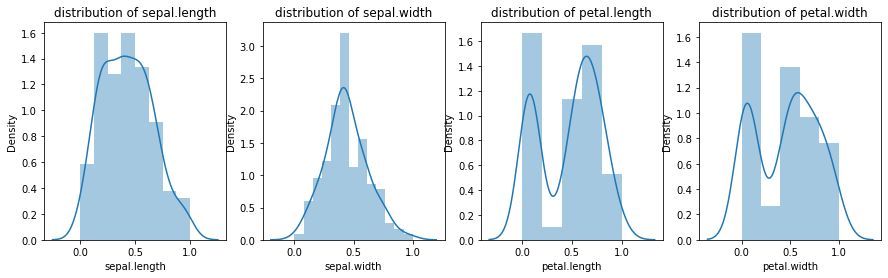

In [24]:
fig , axes = plt.subplots(nrows=1,ncols=4)
fig.set_size_inches(15,4)
sns.distplot(X_scaled[:,0],ax=axes[0])
sns.distplot(X_scaled[:,1],ax=axes[1])
sns.distplot(X_scaled[:,2],ax=axes[2])
sns.distplot(X_scaled[:,3],ax=axes[3])

axes[0].set(xlabel="sepal.length",title = "distribution of sepal.length")
axes[1].set(xlabel="sepal.width",title = "distribution of sepal.width")
axes[2].set(xlabel="petal.length",title = "distribution of petal.length")
axes[3].set(xlabel="petal.width",title = "distribution of petal.width")

### MaxAbsScaler
class preprocessing.MaxAbsScaler(copy=True):
數據的縮放比例為絕對值最大值，並保留正負號，即在區間[-1.0,1.0]內。可以用於稀疏數據scipy.sparse

屬性:
1. scale_ : ndarray,縮放比例
2. max_abs_ : ndarray, 絕對值最大值
3. n_samples_seen_ : int,以處理的樣本個數

In [26]:
from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler().fit(X)
X_scaled = scaler.transform(X)

#scaled之後的資料零均值，單位方差
print("資料集 X 的平均值 : ",X.mean(axis=0))
print("資料集 X 的標準差 : ",X.std(axis=0))

print("\nMaxAbsScaler 縮放過後資料集 X 的平均值 : ",X_scaled.mean(axis=0))
print("MaxAbsScaler 縮放過後資料集 X 的標準差 : ", X_scaled.std(axis=0))

資料集 X 的平均值 :  [5.84333333 3.05733333 3.758      1.19933333]
資料集 X 的標準差 :  [0.82530129 0.43441097 1.75940407 0.75969263]

MaxAbsScaler 縮放過後資料集 X 的平均值 :  [0.73966245 0.69484848 0.54463768 0.47973333]
MaxAbsScaler 縮放過後資料集 X 的標準差 :  [0.10446852 0.09872977 0.2549861  0.30387705]


d:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

[Text(0.5, 0, 'petal.width'), Text(0.5, 1.0, 'distribution of petal.width')]

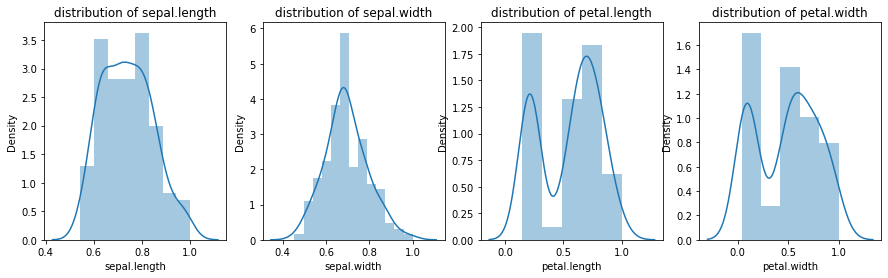

In [27]:
fig , axes = plt.subplots(nrows=1,ncols=4)
fig.set_size_inches(15,4)
sns.distplot(X_scaled[:,0],ax=axes[0])
sns.distplot(X_scaled[:,1],ax=axes[1])
sns.distplot(X_scaled[:,2],ax=axes[2])
sns.distplot(X_scaled[:,3],ax=axes[3])

axes[0].set(xlabel="sepal.length",title = "distribution of sepal.length")
axes[1].set(xlabel="sepal.width",title = "distribution of sepal.width")
axes[2].set(xlabel="petal.length",title = "distribution of petal.length")
axes[3].set(xlabel="petal.width",title = "distribution of petal.width")

### RobustScaler
class preprocessing.RobustScaler(with_centering=True,with_scaling=True,copy=True): 通過Interquartile Range (IQR) 標準化數據,即四分之一和四分之三位點之間

屬性:
1. center_ : ndarray,中心點
2. scale_ : ndarray,縮放比例

In [28]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler().fit(X)
X_scaled = scaler.transform(X)

#scaled之後的資料零均值，單位方差
print("資料集 X 的平均值 : ",X.mean(axis=0))
print("資料集 X 的標準差 : ",X.std(axis=0))

print("\nRobustScaler 縮放過後資料集 X 的平均值 : ",X_scaled.mean(axis=0))
print("RobustScaler 縮放過後資料集 X 的標準差 : ", X_scaled.std(axis=0))

資料集 X 的平均值 :  [5.84333333 3.05733333 3.758      1.19933333]
資料集 X 的標準差 :  [0.82530129 0.43441097 1.75940407 0.75969263]

RobustScaler 縮放過後資料集 X 的平均值 :  [ 0.03333333  0.11466667 -0.16914286 -0.06711111]
RobustScaler 縮放過後資料集 X 的標準差 :  [0.63484715 0.86882194 0.50268688 0.50646175]


d:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

[Text(0.5, 0, 'petal.width'), Text(0.5, 1.0, 'distribution of petal.width')]

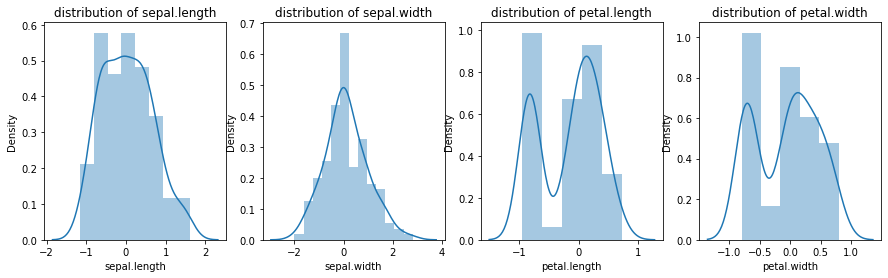

In [29]:
fig , axes = plt.subplots(nrows=1,ncols=4)
fig.set_size_inches(15,4)
sns.distplot(X_scaled[:,0],ax=axes[0])
sns.distplot(X_scaled[:,1],ax=axes[1])
sns.distplot(X_scaled[:,2],ax=axes[2])
sns.distplot(X_scaled[:,3],ax=axes[3])

axes[0].set(xlabel="sepal.length",title = "distribution of sepal.length")
axes[1].set(xlabel="sepal.width",title = "distribution of sepal.width")
axes[2].set(xlabel="petal.length",title = "distribution of petal.length")
axes[3].set(xlabel="petal.width",title = "distribution of petal.width")